In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

/home/sharanya/anaconda2/envs/tensorflow/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
image_pixels = 28
kernel = 5

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
sess = tf.InteractiveSession()

In [4]:
def weight_initialise(shape):
    value = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(value)

def bias_initialise(shape):
    value = tf.constant(0.1, shape=shape)
    return tf.Variable(value)


In [5]:
x = tf.placeholder(tf.float32, shape=[None, 784])
targets = tf.placeholder(tf.float32, shape=[None, 10])

In [6]:
#cnn
input_layer = tf.reshape(x, [-1, image_pixels, image_pixels, 1])

params_conv1 = weight_initialise([kernel, kernel, 1, 32])
bias_conv1 = bias_initialise([32])
output_conv1 = tf.nn.relu(tf.nn.conv2d(input_layer, params_conv1, strides=[1, 1, 1, 1], padding='SAME')+bias_conv1)
pool_conv1 = tf.nn.max_pool(output_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

params_conv2 = weight_initialise([kernel, kernel, 32, 64])
bias_conv2 = bias_initialise([64])
output_conv2 = tf.nn.relu(tf.nn.conv2d(pool_conv1, params_conv2, strides=[1, 1, 1, 1], padding='SAME')+bias_conv2)
pool_conv2 = tf.nn.max_pool(output_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

params_fc1 = weight_initialise([7*7*64, 1024])
bias_fc1 = bias_initialise([1024])

pool_conv2_flat = tf.reshape(pool_conv2, [-1, 7*7*64])

output_fc1 = tf.nn.relu(tf.matmul(pool_conv2_flat, params_fc1) + bias_fc1)

keep_prob = tf.placeholder(tf.float32)
dropout = tf.nn.dropout(output_fc1, keep_prob)

params_fc2 = weight_initialise([1024, 10])
bias_fc2 = bias_initialise([10])
y_conv = tf.matmul(dropout, params_fc2) + bias_fc2

In [7]:
y = tf.nn.softmax(y_conv)

In [10]:
# Loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=targets, logits=y_conv)
cross_entropy = tf.reduce_mean(cross_entropy)
train = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy)

In [11]:
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(targets,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
sess.run(tf.global_variables_initializer())

In [13]:
# Train model
for i in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch_x, targets: batch_y, keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))

    train.run(feed_dict={x: batch_x, targets: batch_y, keep_prob: 0.5})

step 0, training accuracy 0.11
step 200, training accuracy 0.97
step 400, training accuracy 0.92
step 600, training accuracy 0.93
step 800, training accuracy 0.97


In [41]:
def plot_prediction(image_list):
   
    prob = y.eval(feed_dict={x: image_list, keep_prob: 1.0})
    
    pred = np.zeros(len(image_list)).astype(int)
    perc = np.zeros(len(image_list)).astype(int)
    
    import math
    cols = 1
    rows = math.ceil(image_list.shape[0]/cols)
    fig = plt.figure(1, (12., 12.))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=2)
    
    for i in range(len(prob)):
        pred[i] = np.argmax(prob[i]) 
        perc[i] = prob[i][pred[i]] * 100

        image = image_list[i].reshape(28,28)
        grid[i].imshow(image)
        
        grid[i].set_title('Prediction: {0} \nCertainty: {1}%' \
                          .format(pred[i], 
                                  perc[i]))
    plt.show()
    
    return prob 

In [42]:
def recognize_image(x_image, n_steps=1):
    
    original_image = x_image
    probs_per_step = [] 
    
    for i in range(n_steps):
        img_adv_list = original_image
        probs = plot_prediction(img_adv_list)
        probs_per_step.append(probs) 

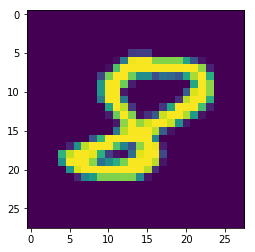

In [143]:
im=mnist.test.images[61]
im=im.reshape(28,28)
plt.imshow(im)
plt.show()

In [165]:
#taking a image as input from computer
import cv2
image_normal = cv2.imread('images/seven.jpg', 0)
image_normal=image_normal.reshape(28,28)
image_normal= np.reshape(image_normal, (1, 784))


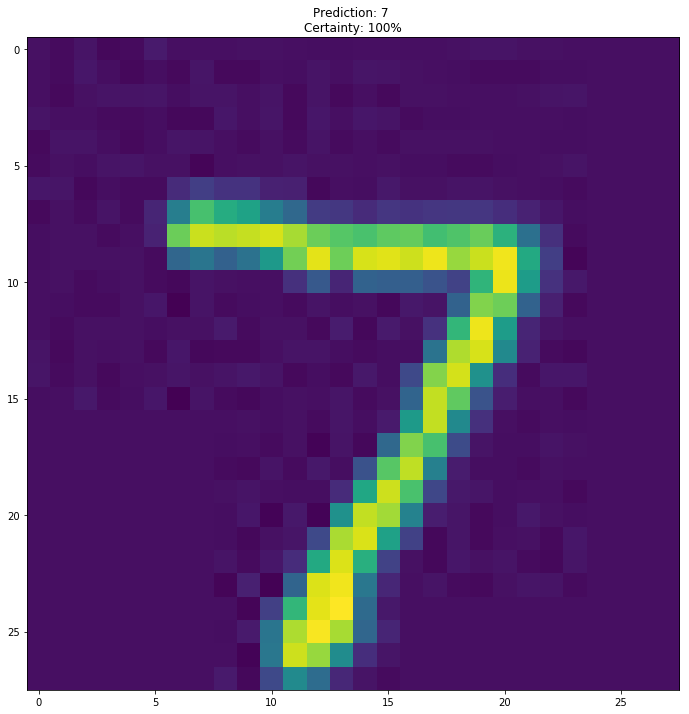

In [166]:
# recognize image
recognize_image(image_normal, n_steps=1)